In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from wordcloud import WordCloud
%matplotlib inline

In [40]:
firearm_mortality = pd.read_csv('CDC Firearm Mortality by State.csv')

In [45]:
firearm_mortality.head()

,YEAR,STATE,RATE,DEATHS
0,2021,AL,26.4,1315
1,2021,AK,25.2,182
2,2021,AZ,18.3,1365
3,2021,AR,23.3,698
4,2021,CA,9.0,3576


In [46]:
firearm_mortality.shape

(450, 4)

# Data Cleaning

In [47]:
firearm_mortality.isna().sum()

YEAR      0
STATE     0
RATE      0
DEATHS    0
dtype: int64

In [48]:
firearm_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    450 non-null    int64  
 1   STATE   450 non-null    object 
 2   RATE    450 non-null    float64
 3   DEATHS  450 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 14.2+ KB


# Data Analysis

In [49]:
firearm_mortality['YEAR'].value_counts()
firearm_mortality['STATE'].value_counts()
firearm_mortality['RATE'].value_counts()
firearm_mortality['DEATHS'].value_counts()

247     4
155     3
1064    3
128     3
172     3
       ..
842     1
1025    1
67      1
3683    1
474     1
Name: DEATHS, Length: 385, dtype: int64

In [50]:
# highest firearm mortality states - Texas Highest
firearm_mortality.groupby('STATE')['DEATHS'].mean().nlargest(15)

STATE
TX    3487.666667
CA    3207.555556
FL    2688.000000
GA    1618.777778
PA    1585.555556
OH    1516.111111
IL    1437.777778
NC    1422.666667
MI    1247.666667
TN    1222.333333
MO    1182.555556
AZ    1108.000000
VA    1032.777778
AL    1030.555556
LA    1022.444444
Name: DEATHS, dtype: float64

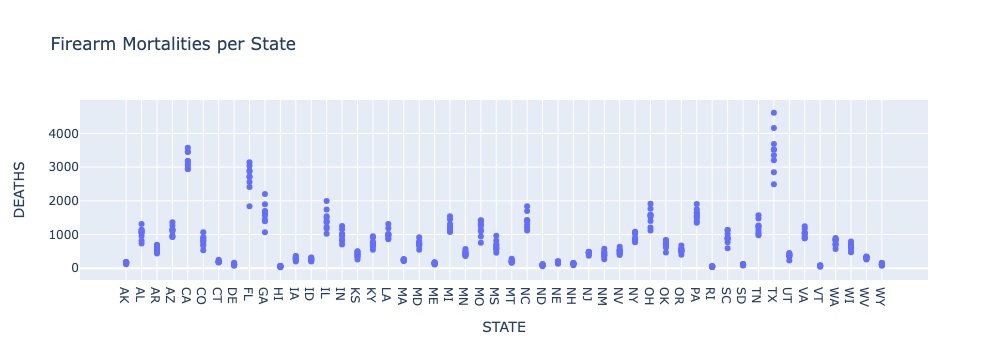

In [51]:
# Firearm Mortalities per State
firearm_mortality.groupby(['STATE','YEAR'])['DEATHS'].mean().reset_index().plot.scatter(
    x = 'STATE', y ='DEATHS', title = 'Firearm Mortalities per State', backend='plotly')

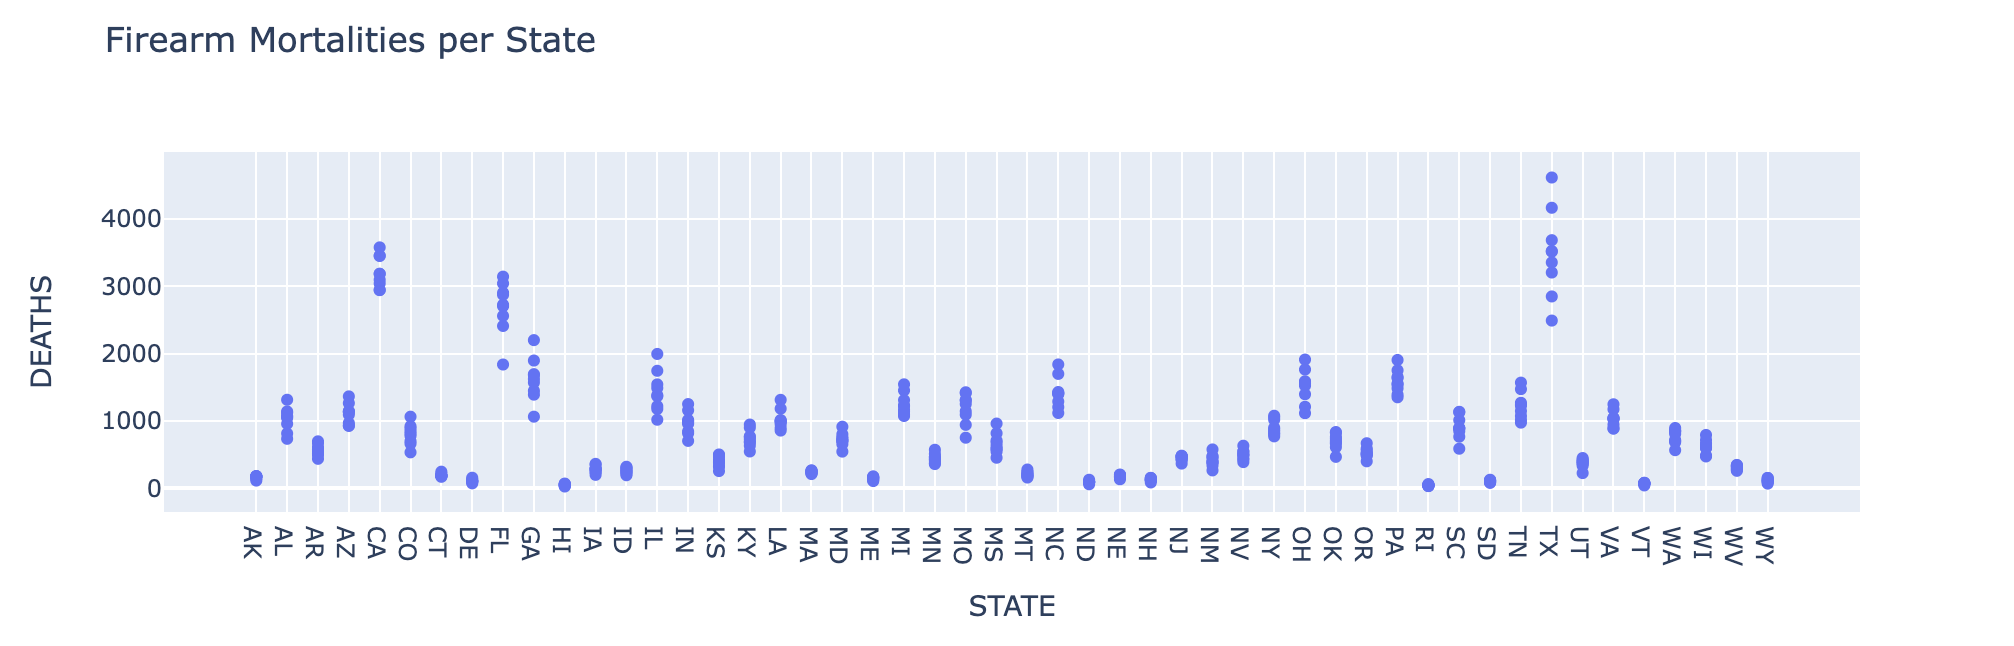

In [52]:
#highest mortality rate by firearm states - Mississippi Highest
firearm_mortality.groupby('STATE')['RATE'].mean().nlargest(15)

STATE
MS    22.766667
AK    22.444444
LA    22.200000
AL    21.211111
WY    20.133333
NM    19.844444
MO    19.555556
MT    19.544444
AR    19.044444
SC    18.211111
TN    18.100000
OK    17.888889
NV    16.588889
KY    16.533333
WV    16.522222
Name: RATE, dtype: float64

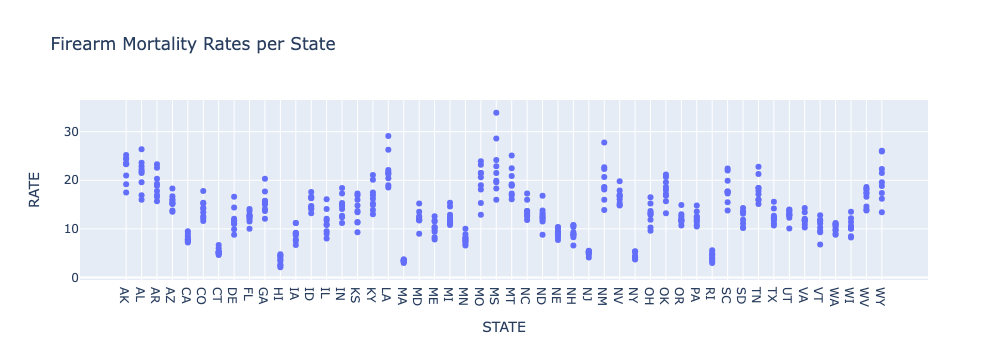

In [53]:
# Firearm Mortality Rates per State
Mortality_rate_by_state = firearm_mortality.groupby(['STATE','YEAR'])['RATE'].mean().reset_index().plot.scatter(
    x = 'STATE', y ='RATE', title = 'Firearm Mortality Rates per State', backend='plotly')
Mortality_rate_by_state

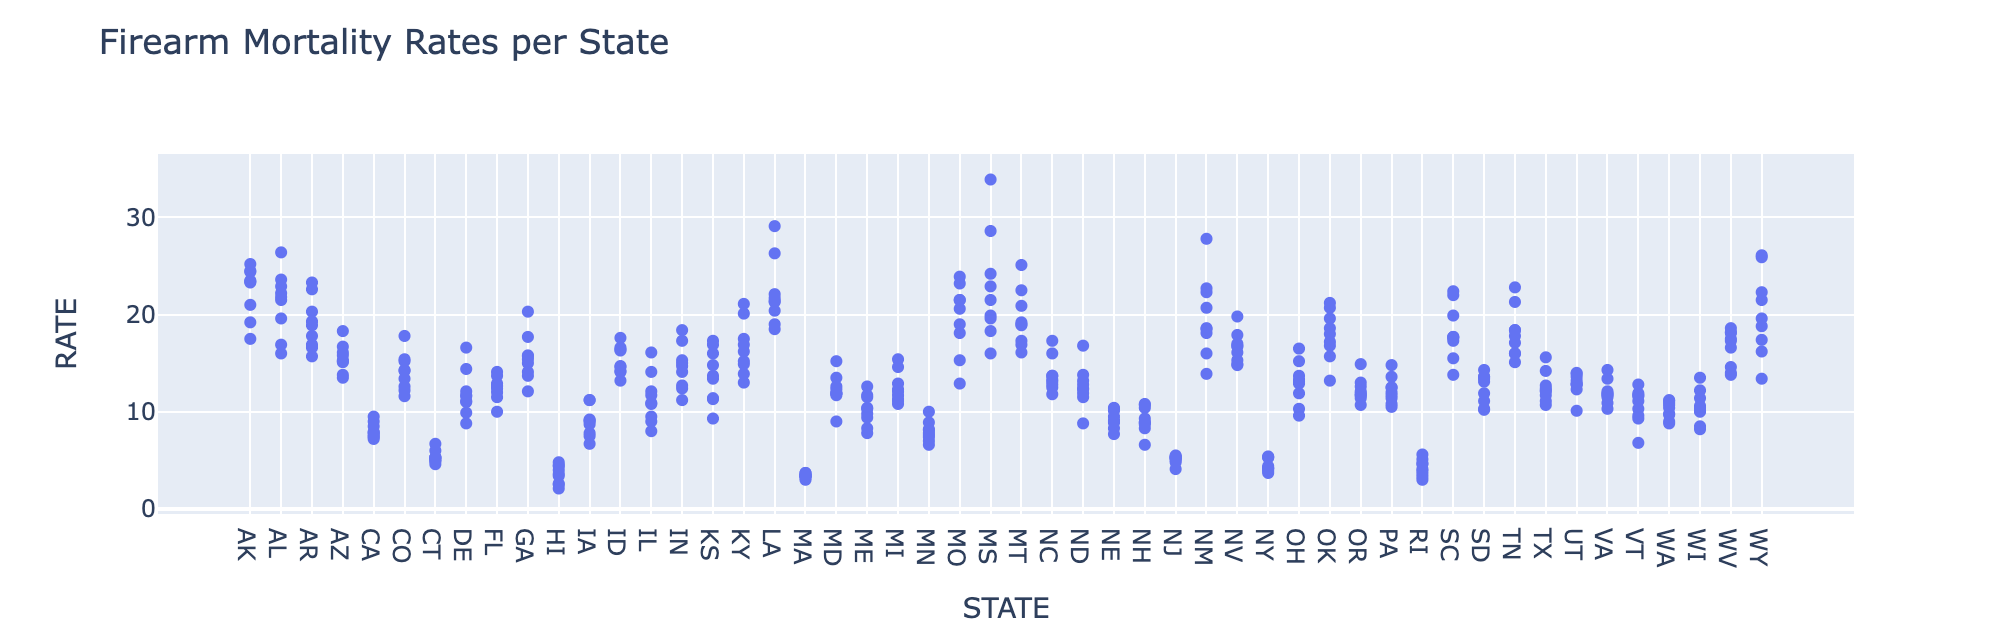

> It's interesting how even though Texas and California have such high numbers of death, since they also have high populations, their mortality rates go down while places like Mississippi have higher rates.

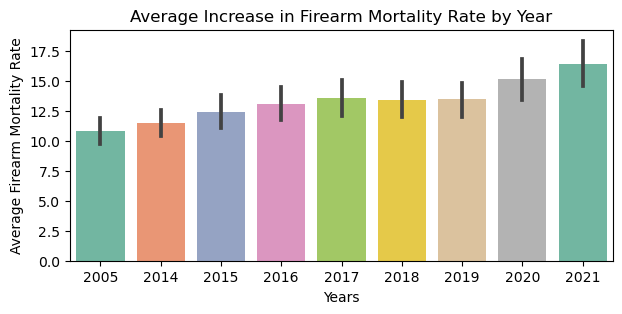

In [54]:
# Average Increase in Firearm Mortality Rate by Year
plt.figure(figsize = (7, 3))
sns.barplot(x ='YEAR', y = 'RATE', data = firearm_mortality, palette = 'Set2')
plt.title('Average Increase in Firearm Mortality Rate by Year')
plt.xlabel('Years')
plt.ylabel('Average Firearm Mortality Rate')
plt.show()

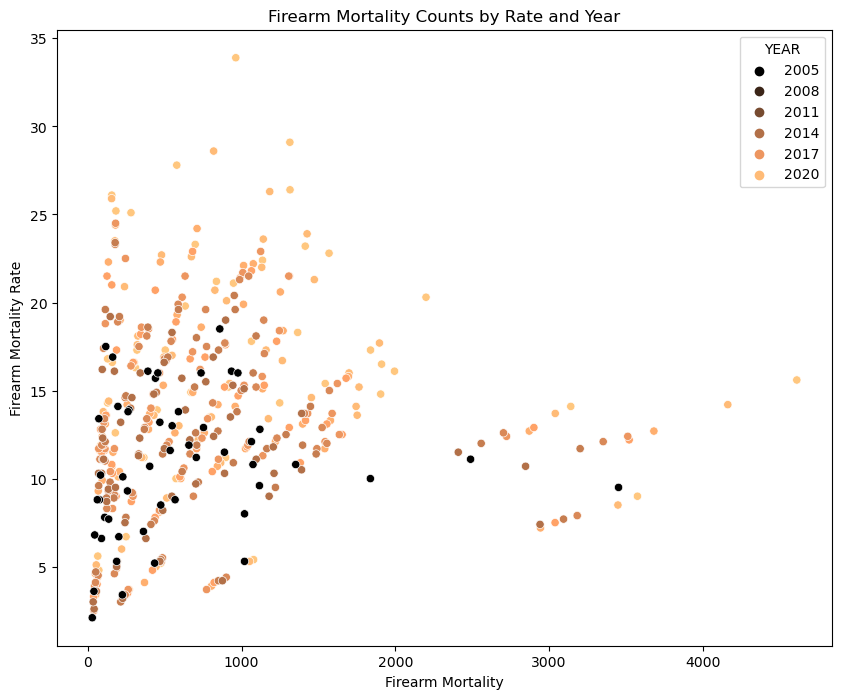

In [55]:
# Firearm Mortality Counts by Rate and Year
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'DEATHS', y = 'RATE', hue = 'YEAR', data = firearm_mortality, palette = 'copper')
plt.title('Firearm Mortality Counts by Rate and Year')
plt.xlabel('Firearm Mortality')
plt.ylabel('Firearm Mortality Rate')
plt.show()

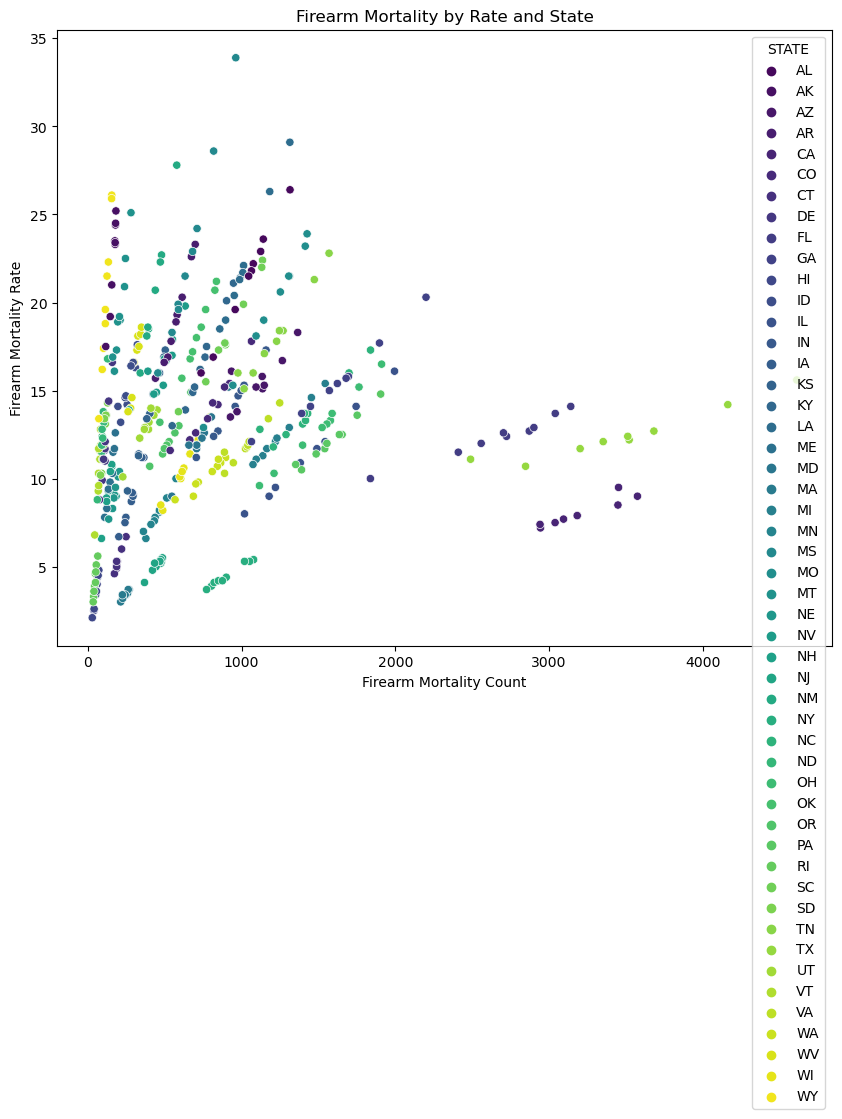

In [56]:
# Firearm Mortality by Rate and State
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'DEATHS', y = 'RATE', hue = 'STATE', data = firearm_mortality, palette = 'viridis')
plt.title('Firearm Mortality by Rate and State')
plt.xlabel('Firearm Mortality Count')
plt.ylabel('Firearm Mortality Rate')
plt.show()

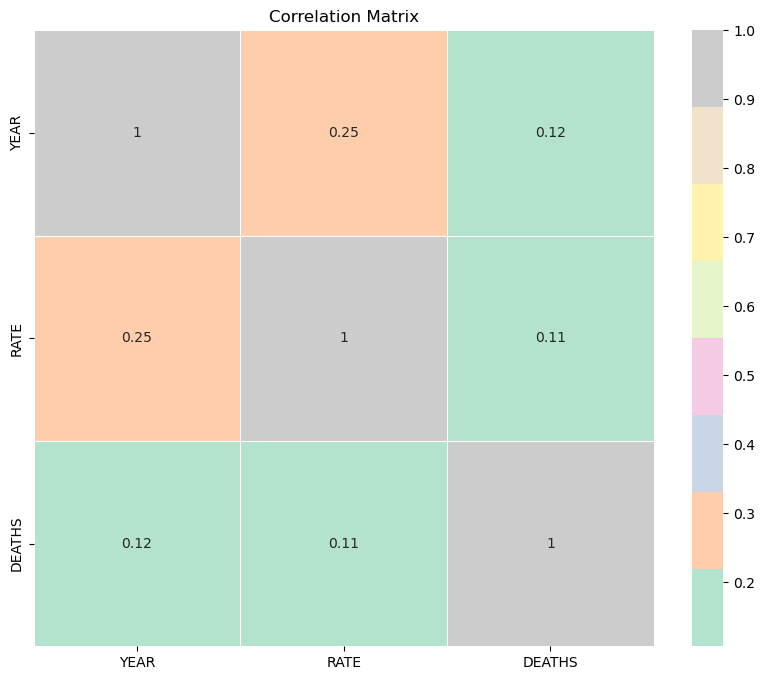

In [57]:
correlation_matrix = firearm_mortality.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel2', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> The entire table has weak and very weak correlations between Year, Rate, and Deaths. This suggests that all three have very little to do with each other

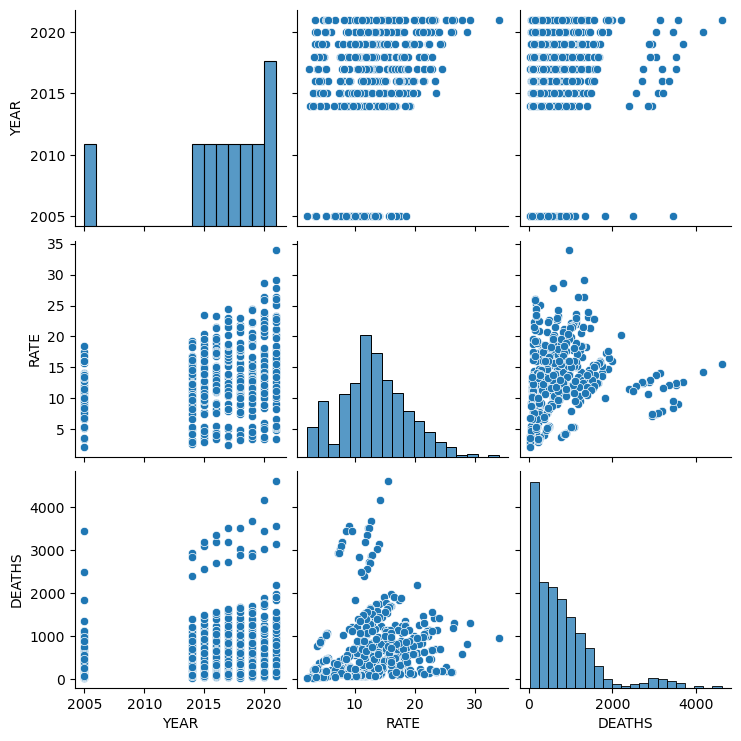

In [58]:
# Basic correlogram
sns.pairplot(firearm_mortality)
plt.show()

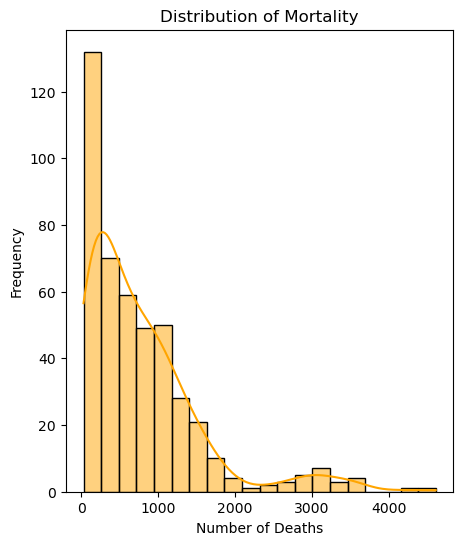

In [59]:
# Distribution of number of deaths
plt.figure(figsize=(5, 6))
sns.histplot(firearm_mortality['DEATHS'], bins=20, kde=True, color='orange')
plt.title('Distribution of Mortality')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()

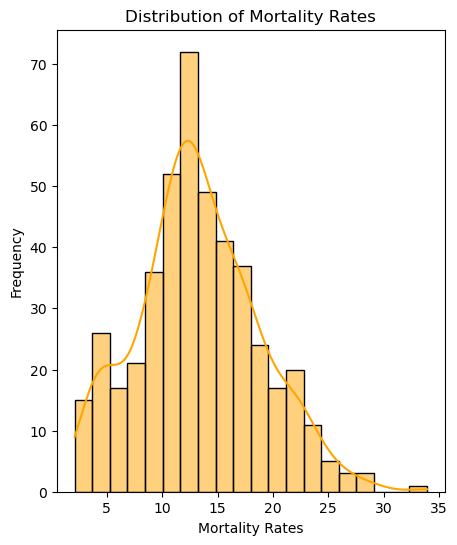

In [60]:
# Distribution of Death Rates
plt.figure(figsize=(5, 6))
sns.histplot(firearm_mortality['RATE'], bins=20, kde=True, color='orange')
plt.title('Distribution of Mortality Rates')
plt.xlabel('Mortality Rates')
plt.ylabel('Frequency')
plt.show()

In [61]:
# firearm_mortality by Year
mortality2021 = firearm_mortality[:50]
mortality2020 = firearm_mortality[50:100]
mortality2019 = firearm_mortality[100:150]
mortality2018 = firearm_mortality[150:200]
mortality2017 = firearm_mortality[200:250]
mortality2016 = firearm_mortality[250:300]
mortality2015 = firearm_mortality[300:350]
mortality2014 = firearm_mortality[350:400]
mortality2005 = firearm_mortality[400:450]